In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

# set random seeds
np.random.seed(2)
tf.random.set_seed(2)

In [2]:
# load spread data
spread = pd.read_csv('../Data/NFL_Spread_Data_Pre2020.csv')

In [3]:
# use OrdinalEncoder to transform team and opp to numeric value
ord_enc = OrdinalEncoder()
spread['team_code'] = ord_enc.fit_transform(spread[['team']])
spread.team_code = spread.team_code.astype(int)
spread['opp_code'] = ord_enc.fit_transform(spread[['opp']])
spread.opp_code = spread.opp_code.astype(int)
Codes = spread[['team', 'team_code', 'opp', 'opp_code']]

In [4]:
# drop 'Team' and 'Opp' since they are now encoded
spread.drop(['team', 'opp'], axis = 1, inplace = True)
spread.head()

,season,week,game,day,time,tm_off_bye,opp_off_bye,tm_btwn_gms,opp_btwn_gms,h_or_a,...,opp_winning_streak,opp_not_cover_streak,opp_cover_streak,opp_under_streak,opp_over_streak,spread,spread_outcome,over/under,team_code,opp_code
0,2010,2,2,0,0,0,0,7,7,1,...,1.0,0.0,1.0,1.0,0.0,13.0,0,43.0,3,11
1,2010,3,3,0,0,0,0,7,7,1,...,0.0,1.0,0.0,0.0,2.0,14.5,1,43.0,3,21
2,2010,4,4,0,0,0,0,7,7,0,...,2.0,0.0,2.0,0.0,2.0,6.0,0,37.0,3,24
3,2010,5,5,0,0,0,0,7,7,0,...,1.0,0.0,1.0,0.0,1.0,-2.5,0,41.5,3,14
4,2010,7,6,0,0,1,0,14,7,1,...,0.0,0.0,0.0,1.0,0.0,12.5,1,40.0,3,2


In [5]:
ABC = spread[['tm_def_rushy_avg', 'opp_def_rushy_avg', 'opp_off_rushy_avg', 'opp_pass_att_avg', 'opp_def_passy_avg',
              'tm_def_score_avg', 'tm_pass_att_avg', 'opp_off_score_avg', 'tm_def_1std_avg', 'opp_def_1std_avg',
              'opp_def_score_avg', 'tm_def_passy_avg', 'tm_off_totyd_avg', 'opp_off_passy_avg', 'tm_off_score_avg',
              'opp_rush_td_avg', 'tm_sacked_avg', 'tm_def_to_avg', 'opp_off_to_avg', 'opp_sacked_avg', 'tm_off_to_avg',
              'tm_rush_td_avg', 'opp_off_1stdwn_avg', 'opp_def_to_avg', 'tm_pass_td_avg', 'spread', 'opp_pass_td_avg',
              'opp_code', 'over/under', 'team_code', 'tm_winning%', 'spread_outcome']]

corr = ABC.corr()
corr

,tm_def_rushy_avg,opp_def_rushy_avg,opp_off_rushy_avg,opp_pass_att_avg,opp_def_passy_avg,tm_def_score_avg,tm_pass_att_avg,opp_off_score_avg,tm_def_1std_avg,opp_def_1std_avg,...,opp_off_1stdwn_avg,opp_def_to_avg,tm_pass_td_avg,spread,opp_pass_td_avg,opp_code,over/under,team_code,tm_winning%,spread_outcome
tm_def_rushy_avg,1.000000,-0.047796,0.011603,-0.010865,0.017388,0.423718,0.155361,0.020915,0.386849,-0.027349,...,0.008960,0.050018,-0.097367,2.316725e-01,0.031870,-0.002558,4.804427e-02,-0.047358,-0.385117,1.211395e-02
opp_def_rushy_avg,-0.047796,1.000000,-0.198867,0.155361,-0.112730,-0.028549,-0.010865,-0.226693,-0.027349,0.386849,...,-0.134204,-0.138668,0.031870,-2.316725e-01,-0.097367,-0.047358,4.804427e-02,-0.002558,0.022102,-1.211395e-02
opp_off_rushy_avg,0.011603,-0.198867,1.000000,-0.462941,-0.032367,0.033324,0.019297,0.342864,0.025888,-0.111005,...,0.300713,0.156652,-0.001001,1.787156e-01,0.030643,0.055636,2.394645e-02,0.016181,-0.027711,1.092694e-02
opp_pass_att_avg,-0.010865,0.155361,-0.462941,1.000000,0.106742,-0.001375,0.006198,0.067613,-0.003242,0.067633,...,0.461455,-0.190679,0.010088,1.306114e-02,0.246091,-0.104080,2.697667e-01,-0.005904,0.060481,-3.554984e-03
opp_def_passy_avg,0.017388,-0.112730,-0.032367,0.106742,1.000000,0.028173,0.002414,0.263314,0.045220,0.690243,...,0.142979,0.011298,-0.005014,-3.417797e-02,0.252947,0.048754,2.873974e-01,0.006143,-0.014744,-1.338257e-02
tm_def_score_avg,0.423718,-0.028549,0.033324,-0.001375,0.028173,1.000000,0.336328,0.015934,0.600164,0.006208,...,0.044934,-0.009465,0.068594,2.771045e-01,0.010906,0.012195,2.127892e-01,0.015231,-0.593058,1.464945e-02
tm_pass_att_avg,0.155361,-0.010865,0.019297,0.006198,0.002414,0.336328,1.000000,0.032530,0.067633,-0.003242,...,0.036679,0.016939,0.246091,-1.306114e-02,0.010088,-0.005904,2.697667e-01,-0.104080,-0.200841,3.554984e-03
opp_off_score_avg,0.020915,-0.226693,0.342864,0.067613,0.263314,0.015934,0.032530,1.000000,0.030766,0.109923,...,0.668686,0.337534,0.016797,4.104674e-01,0.732448,-0.023505,4.335465e-01,0.000220,0.012421,1.704247e-02
tm_def_1std_avg,0.386849,-0.027349,0.025888,-0.003242,0.045220,0.600164,0.067633,0.030766,1.000000,0.030888,...,0.038392,-0.011744,0.147122,1.220182e-01,0.023340,0.013212,2.541407e-01,0.013686,-0.238912,2.093397e-02
opp_def_1std_avg,-0.027349,0.386849,-0.111005,0.067633,0.690243,0.006208,-0.003242,0.109923,0.030888,1.000000,...,-0.008379,-0.041417,0.023340,-1.220182e-01,0.147122,0.013686,2.541407e-01,0.013212,0.000731,-2.093397e-02


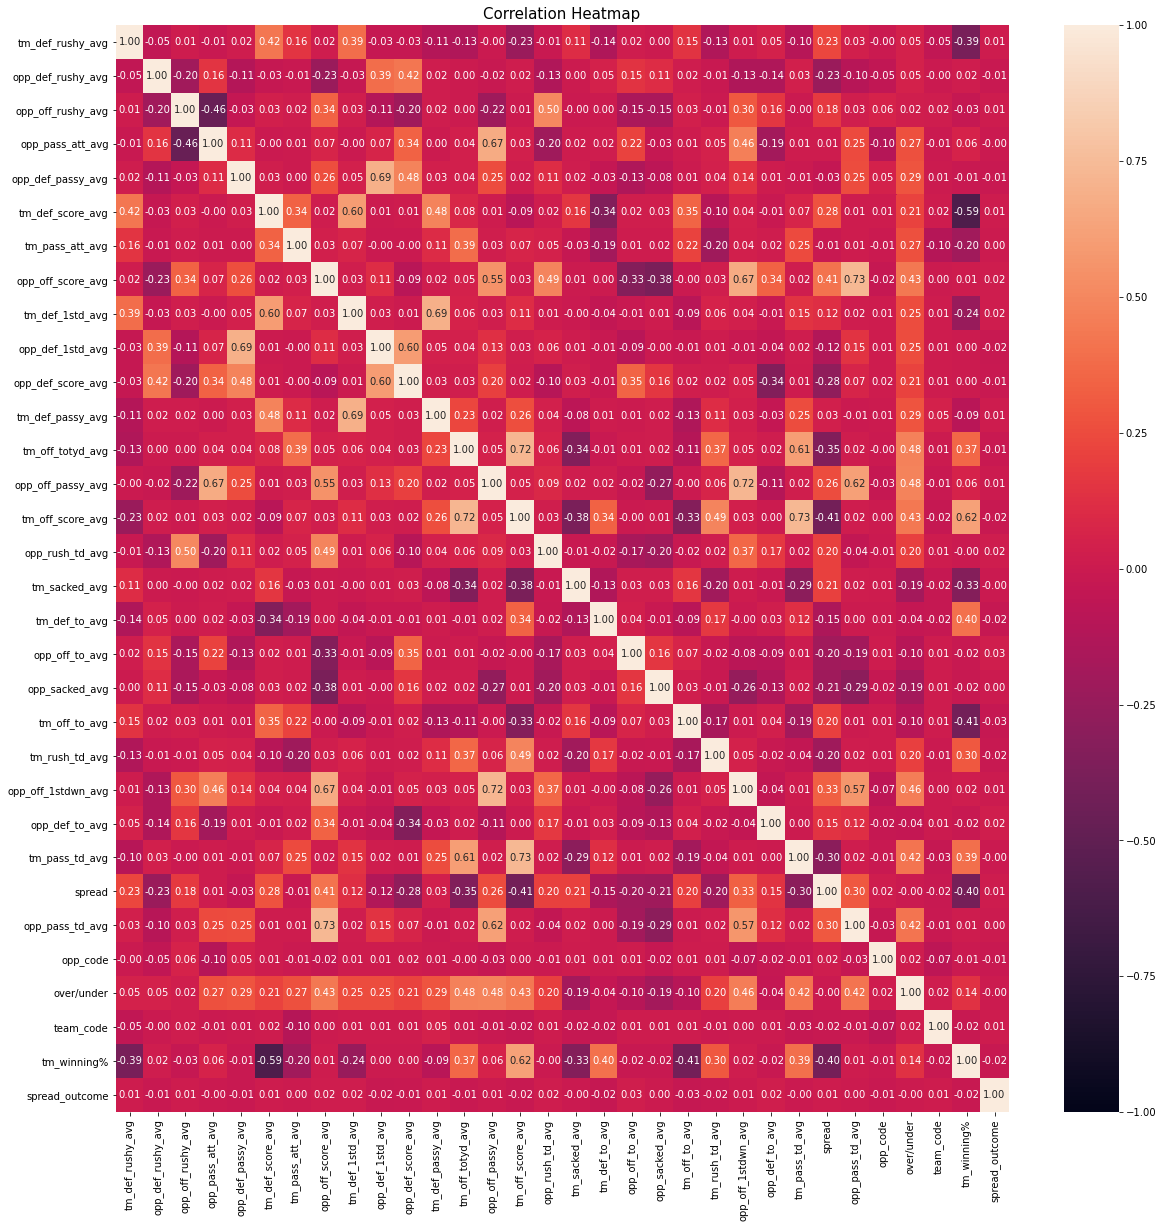

In [6]:
# correlation heatmap of new features
plt.figure(figsize = (20,20))
sns.heatmap(corr, vmin = -1, vmax =1, annot = True, fmt = '.2f')
plt.title('Correlation Heatmap', fontdict = {'fontsize':15})
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.show()

In [7]:
# features and target
X = ABC.iloc[:,:-1].values
y = ABC.iloc[:,-1].values

In [8]:
# scale using StandardScaler, then fit_transform
sc = StandardScaler()
X = sc.fit_transform(X)

In [9]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 50)

# number of samples in each set
print('Samples in training set:', X_train.shape[0])
print('Samples in testing set:', X_test.shape[0])

Samples in training set: 3739
Samples in testing set: 935


In [10]:
# define the keras model
ann_spread = Sequential()
ann_spread.add(Dense(32, input_dim = 31, activation = 'elu'))
ann_spread.add(Dropout(0.3))
ann_spread.add(Dense(16, activation = 'elu'))
ann_spread.add(Dropout(0.2))
ann_spread.add(Dense(4, activation = 'elu'))
ann_spread.add(Dense(1, activation = 'sigmoid'))

In [11]:
# compile the keras model
ann_spread.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [12]:
# fit the keras model on the training set
history = ann_spread.fit(X_train, y_train, validation_data = (X_test, y_test),
                         epochs = 44, batch_size = 500, verbose = 0)

In [13]:
# evaluate the keras model
_,accuracy = ann_spread.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy * 100))
_,accuracy = ann_spread.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy * 100))

117/117 [==============================] - 0s 572us/step - loss: 0.6842 - accuracy: 0.5592
Accuracy: 55.92
30/30 [==============================] - 0s 551us/step - loss: 0.6946 - accuracy: 0.5316
Accuracy: 53.16


In [14]:
ann_spread.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                1024      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 68        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 1,625
Trainable params: 1,625
Non-trainable params: 0
______________________________________________________

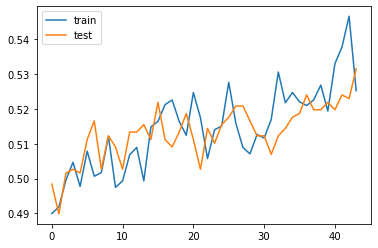

In [15]:
# plot history
plt.plot(history.history['accuracy'], label = 'train')
plt.plot(history.history['val_accuracy'], label = 'test')
plt.legend()
plt.show()

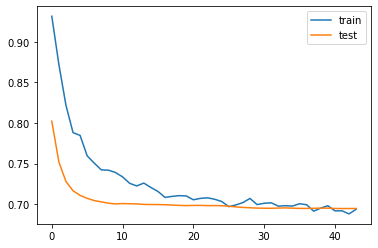

In [16]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [17]:
# save model, weights, architecture
ann_spread.save("..\\Pickles\\ann_spread.h5")